<a href="https://colab.research.google.com/github/DevinaHantara/Devina/blob/main/Sales_Data_MCDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread gspread_dataframe pandas

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from google.auth import default

In [19]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [20]:
sheet_url = "https://docs.google.com/spreadsheets/d/1SCBVm_HmmQTik2F-BcPgmNGx7TVUnEQbTQZ_OMrAWPE/edit?gid=1903509374#gid=1903509374"
sheet = gc.open_by_url(sheet_url)

In [21]:
worksheet = sheet.get_worksheet(0)

In [22]:
df = pd.DataFrame(worksheet.get_all_records())

In [23]:
df["Total Sales"] = df["Unit price"] * df["Quantity"]

<ipython-input-24-4235772d057e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")


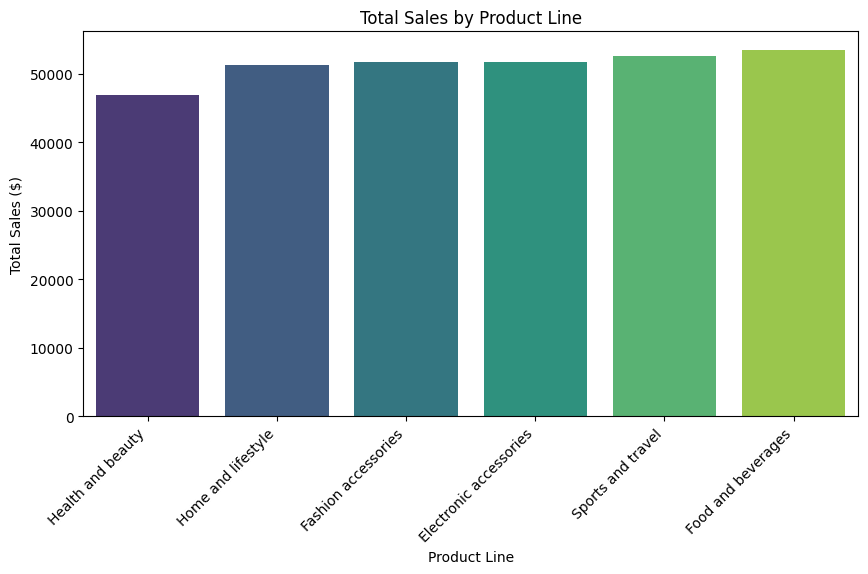

Highest selling product line: Food and beverages
Lowest selling product line: Health and beauty


In [24]:
sales_by_product = df.groupby("Product line")["Total Sales"].sum().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Sales ($)")
plt.xlabel("Product Line")
plt.title("Total Sales by Product Line")
plt.show()

print("Highest selling product line:", sales_by_product.idxmax())
print("Lowest selling product line:", sales_by_product.idxmin())

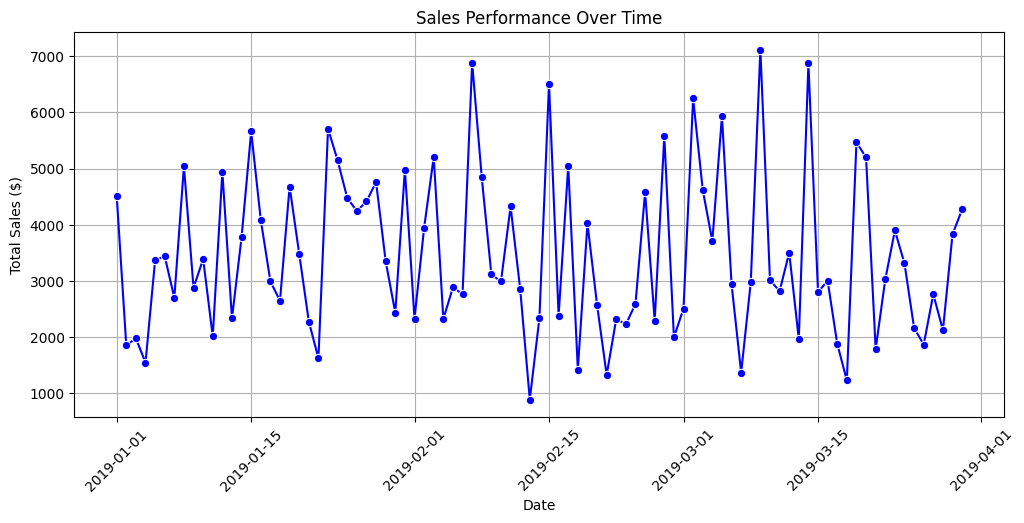

In [25]:
df["Date"] = pd.to_datetime(df["Date"])
sales_over_time = df.groupby("Date")["Total Sales"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values, marker="o", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Performance Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-26-d252bcdee432>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_deal_size = df.groupby("Deal Size")["Total Sales"].sum()


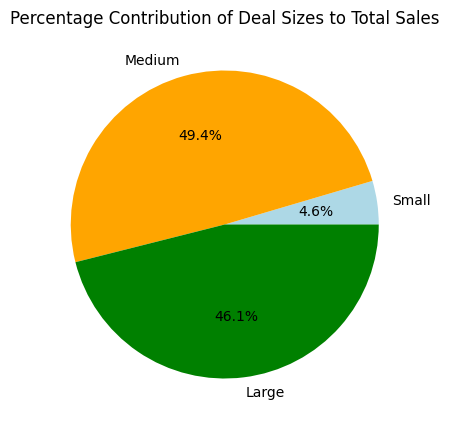

Percentage Contribution by Deal Size:
Deal Size
Small      4.568429
Medium    49.368147
Large     46.063424
Name: Total Sales, dtype: float64


In [26]:
bins = [0, 100, 500, df["Total Sales"].max()]
labels = ["Small", "Medium", "Large"]
df["Deal Size"] = pd.cut(df["Total Sales"], bins=bins, labels=labels)

sales_by_deal_size = df.groupby("Deal Size")["Total Sales"].sum()
sales_percentage = (sales_by_deal_size / sales_by_deal_size.sum()) * 100

plt.figure(figsize=(8, 5))
sales_percentage.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "orange", "green"])
plt.title("Percentage Contribution of Deal Sizes to Total Sales")
plt.ylabel("")
plt.show()

print("Percentage Contribution by Deal Size:")
print(sales_percentage)